In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import copy
%run MLR_Functions.ipynb

In [2]:
df_rice_y = pd.read_csv("/Users/yxlsa/Desktop/SUTD/DTPIII/Cleaned Data/df_crop_yield.csv")
df_fert_use = pd.read_csv("/Users/yxlsa/Desktop/SUTD/DTPIII/Cleaned Data/df_fertilizer_usage.csv")
df_cropland = pd.read_csv("/Users/yxlsa/Desktop/SUTD/DTPIII/Cleaned Data/df_cropland.csv")
df_energy = pd.read_csv("/Users/yxlsa/Desktop/SUTD/DTPIII/Cleaned Data/df_energy_usage.csv")
df_pop = pd.read_csv("/Users/yxlsa/Desktop/SUTD/DTPIII/Cleaned Data/df_urban_rural_pop.csv")
df_water = pd.read_csv("/Users/yxlsa/Desktop/SUTD/DTPIII/Cleaned Data/df_water_usage.csv")
df_pesticide = pd.read_csv("/Users/yxlsa/Desktop/SUTD/DTPIII/Cleaned Data/df_pesticide_usage.csv")
df_pesticide_imports = pd.read_csv("/Users/yxlsa/Desktop/SUTD/DTPIII/Cleaned Data/df_pesticide_imports.csv")
df_air_dep = pd.read_csv("/Users/yxlsa/Desktop/SUTD/DTPIII/Cleaned Data/df_air_deposition_nitrogen.csv")

In [3]:
df_THAI = pd.DataFrame()
df_THAI["Yield"] = df_rice_y["Thailand Rice Yield"]
df_THAI["Cropland"] = df_cropland["Thailand Crop Land"]
df_THAI["Energy"] = df_energy["Thailand energy/cropland"]
df_THAI["Fert"] = df_fert_use["Thailand"]
df_THAI["Rural Pop"] = df_pop["thailand rural/total"]
df_THAI["Urban Pop"] = df_pop["thailand urban/total"]
df_THAI["Water"] = df_water["wf_tot_m3_t_thailand"]
df_THAI["Pesticide"] = df_pesticide["India Pesticide"]
df_THAI["Pesticide Import"] = df_pesticide_imports["Thailand"]
df_THAI["Air Deposition of Nitrogen"] = df_air_dep["Thailand Air Deposition of Nitrogen"]

df_THAI

,Yield,Cropland,Energy,Fert,Rural Pop,Urban Pop,Water,Pesticide,Pesticide Import,Air Deposition of Nitrogen
0,1.9556,20603.0000,0.016774,50.660000,0.723072,0.301452,2801.857667,0.44,1.503185,6.8414
1,2.2534,20726.0000,0.016327,46.420002,0.718609,0.302042,2559.945281,0.42,1.229454,6.6988
2,2.1745,20574.0000,0.020647,54.330000,0.713454,0.302332,2614.282257,0.42,1.272915,6.9686
3,2.0497,20445.0000,0.022891,71.160000,0.707804,0.302387,2440.991593,0.39,1.230838,7.2271
4,2.3521,20538.0000,0.016827,66.939995,0.702430,0.302546,2249.798274,0.36,1.463031,7.4001
5,2.4158,20631.0000,0.017973,73.840000,0.698021,0.303106,2387.660821,0.36,1.567750,7.6855
6,2.4098,20724.0000,0.021540,75.750000,0.694821,0.304188,2071.595781,0.33,2.057729,7.9887
7,2.3788,20817.0000,0.028534,75.400000,0.692356,0.305585,2345.042479,0.31,2.046642,7.7375
8,2.4180,20909.0000,0.036329,85.030000,0.690393,0.307211,2419.960932,0.29,1.556494,8.7682
9,2.4244,21002.0000,0.027940,91.580000,0.688809,0.309013,2048.445773,0.27,2.444729,8.2513


In [4]:
# Extract the features and the target
df_features, df_target = get_features_targets(df_THAI,["Energy","Fert","Rural Pop", "Urban Pop", "Water","Pesticide", "Pesticide Import", "Air Deposition of Nitrogen"],["Yield"])

# Split the data set into training and test
df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features, df_target, random_state = 100, test_size = 0.3)

#print(df_features_train)
#print(df_features_test)

# Normalize the features using z normalization
array_features_train_z, means, stds = normalize_z(df_features_train)

# Change the features and the target to numpy array using the prepare functions

X: np.ndarray = prepare_feature(array_features_train_z)
target: np.ndarray = df_target_train.to_numpy()

iterations: int = 1500
alpha: float = 0.01
beta: np.ndarray = np.zeros((9,1))

# Call the gradient_descent function
beta, J_storage = gradient_descent_linreg(X, target, beta, alpha,iterations)

# call the predict() method
pred: np.ndarray = predict_linreg(df_features_test,beta, means,stds)

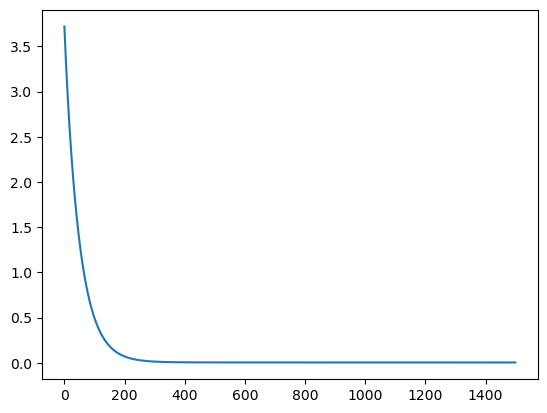

In [5]:
plt.plot(J_storage)

In [6]:
# change target test set to a numpy array
target: np.ndarray = df_target_test.to_numpy()

# Calculate r2 score by calling a function
r2: float = r2_score(target, pred)
    
# Calculate adj r2
#Set the n and k
n = 120
k = 8
adj_r2: float = adj_r_squared(n,k,target,pred)

# Calculate the mse
mse: float = np.mean((target-pred)**2)
    
# Calculate the mae
mae: float = np.mean(np.absolute(target-pred))
    
print(f"r2: {r2}")
print(f"adj_r_squared: {adj_r2}")
print(f"mse: {mse}")
print(f"mae: {mae}")

r2: 0.6823717785023844
adj_r_squared: 0.6594796544304842
mse: 0.02244892957107589
mae: 0.14126334004715194


In [7]:
print(pred)
print(df_target_test)
print(df_features_test)
print(beta)

[[2.66038123]
 [3.07769743]
 [3.17729339]
 [2.80797892]
 [2.36092836]
 [2.77437603]
 [3.2610709 ]
 [2.95621736]
 [2.56429306]]
     Yield
9   2.4244
26  2.9740
28  3.0380
13  2.9339
5   2.4158
12  2.9338
27  3.0690
25  2.8506
6   2.4098
      Energy        Fert  Rural Pop  Urban Pop        Water  Pesticide  \
9   0.027940   91.580000   0.688809   0.309013  2048.445773       0.27   
26  0.043608  112.460000   0.502792   0.472514  1850.208600       0.24   
28  0.059603  105.150000   0.486829   0.485831  1614.844920       0.24   
13  0.037560  111.420000   0.648365   0.348208  1856.321877       0.24   
5   0.017973   73.840000   0.698021   0.303106  2387.660821       0.36   
12  0.033156   88.979996   0.661119   0.336555  1836.180279       0.25   
27  0.048660  126.970000   0.494668   0.479088  1605.455422       0.24   
25  0.063195  103.760000   0.510879   0.465836  1911.477882       0.24   
6   0.021540   75.750000   0.694821   0.304188  2071.595781       0.33   

    Pesticide Import  

In [8]:
###27  3.0690
###27  0.048660  126.970000   0.494668   0.479088  1605.455422       0.24         10.084006                      9.0383 

country_yield = 3.0690
energy = 0.048660
fert_use = 126.970000
rural_pop = 0.494668
urban_pop = 0.479088
water = 1605.455422
pesticide = 0.24
pesticide_imports = 10.084006
air_dep = 9.0383 

def normalise(feature_value:int, mean, std):
    return (feature_value-mean)/std
    

def get_crop_yield(energy, fert_use, rural_pop, urban_pop, water, pesticide, pesticide_imports, air_dep, beta):
    energy_n = normalise(energy, means[0],stds[0])
    fert_use_n = normalise(fert_use ,means[1],stds[1])
    rural_pop_n = normalise(rural_pop ,means[2],stds[2]) 
    urban_pop_n = normalise(urban_pop ,means[3],stds[3])
    water_n = normalise(water ,means[4],stds[4])
    pesticide_n = normalise(pesticide, means[5], stds[5])
    pesticide_imports_n = normalise(pesticide_imports, means[6],stds[6])
    air_dep_n = normalise(air_dep, means[7],stds[7])
    y = beta[0] + beta[1]*energy_n + beta[2]*fert_use_n + beta[3]*rural_pop_n + beta[4]*urban_pop_n + beta[5]*water_n + beta[6]*pesticide_n + beta[7]*pesticide_imports_n + beta[8]*air_dep_n
    return y

print(get_crop_yield(energy, fert_use, rural_pop, urban_pop, water, pesticide, pesticide_imports, air_dep, beta))

[3.2610701]
